In [1]:
import numpy as np

In [2]:
import torch

In [3]:
p = np.sqrt(2)
p

np.float64(1.4142135623730951)

In [4]:
import os


def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
      dir_path (str or pathlib.Path): target directory

    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(
            f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
        )

In [5]:
walk_through_dir("train")

There are 3 directories and 0 images in 'train'.
There are 0 directories and 300 images in 'train\M_train'.
There are 0 directories and 240 images in 'train\NM_train'.
There are 0 directories and 348 images in 'train\PM_train'.


In [6]:
walk_through_dir("test")

There are 3 directories and 0 images in 'test'.
There are 0 directories and 37 images in 'test\M_test'.
There are 0 directories and 17 images in 'test\NM_test'.
There are 0 directories and 23 images in 'test\PM_test'.


In [7]:
walk_through_dir(".")

There are 5 directories and 6 images in '.'.
There are 0 directories and 337 images in '.\M'.
There are 0 directories and 257 images in '.\NM'.
There are 0 directories and 371 images in '.\PM'.
There are 3 directories and 0 images in '.\test'.
There are 0 directories and 37 images in '.\test\M_test'.
There are 0 directories and 17 images in '.\test\NM_test'.
There are 0 directories and 23 images in '.\test\PM_test'.
There are 3 directories and 0 images in '.\train'.
There are 0 directories and 300 images in '.\train\M_train'.
There are 0 directories and 240 images in '.\train\NM_train'.
There are 0 directories and 348 images in '.\train\PM_train'.


In [8]:
walk_through_dir("./.")

There are 5 directories and 6 images in './.'.
There are 0 directories and 337 images in './.\M'.
There are 0 directories and 257 images in './.\NM'.
There are 0 directories and 371 images in './.\PM'.
There are 3 directories and 0 images in './.\test'.
There are 0 directories and 37 images in './.\test\M_test'.
There are 0 directories and 17 images in './.\test\NM_test'.
There are 0 directories and 23 images in './.\test\PM_test'.
There are 3 directories and 0 images in './.\train'.
There are 0 directories and 300 images in './.\train\M_train'.
There are 0 directories and 240 images in './.\train\NM_train'.
There are 0 directories and 348 images in './.\train\PM_train'.


In [9]:
os.getcwd()

'f:\\Vision_based_transformers\\Cancer_prediction_using_DNN\\Codes-20250214T181209Z-001\\Codes\\Traning Data and Code\\Blue_ROI\\Buccal_Mucosa'

In [10]:
os.chdir(
    "F:\Vision_based_transformers\Cancer_prediction_using_DNN\Codes-20250214T181209Z-001\Codes\Traning Data and Code\Blue_ROI\Buccal_Mucosa"
)

In [11]:
os.getcwd()

'F:\\Vision_based_transformers\\Cancer_prediction_using_DNN\\Codes-20250214T181209Z-001\\Codes\\Traning Data and Code\\Blue_ROI\\Buccal_Mucosa'

In [12]:
image_path = str(os.getcwd)


train_dir = image_path + str("//train")
test_dir = image_path + str("//test")

train_dir, test_dir

('<built-in function getcwd>//train', '<built-in function getcwd>//test')

In [13]:
import random
from pathlib import Path
from PIL import Image

# Set seed for reproducibility (change this to get different results)
random.seed(42)

# Define the base directory where images are stored
image_path = Path(r"train")  # <- Update with your actual path

# 1. Get all image paths recursively (*/*/*.jpg means it looks inside subdirectories)
image_path_list = list(
    image_path.glob("**/*.jpg")
)  # Finds all .jpg files in subdirectories

# 2. Ensure there are images before selecting
if not image_path_list:
    print("No images found in the directory!")
else:
    # 3. Get a random image path
    random_image_path = random.choice(image_path_list)

    # 4. Get the image class (parent folder name)
    image_class = random_image_path.parent.stem

    # 5. Open the image
    img = Image.open(random_image_path)

    # 6. Print metadata
    print(f"Random image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image height: {img.height}")
    print(f"Image width: {img.width}")

    # 7. Display the image
    img.show()

Random image path: train\PM_train\180_L_b_3.jpg
Image class: PM_train
Image height: 764
Image width: 827


(np.float64(-0.5), np.float64(826.5), np.float64(763.5), np.float64(-0.5))

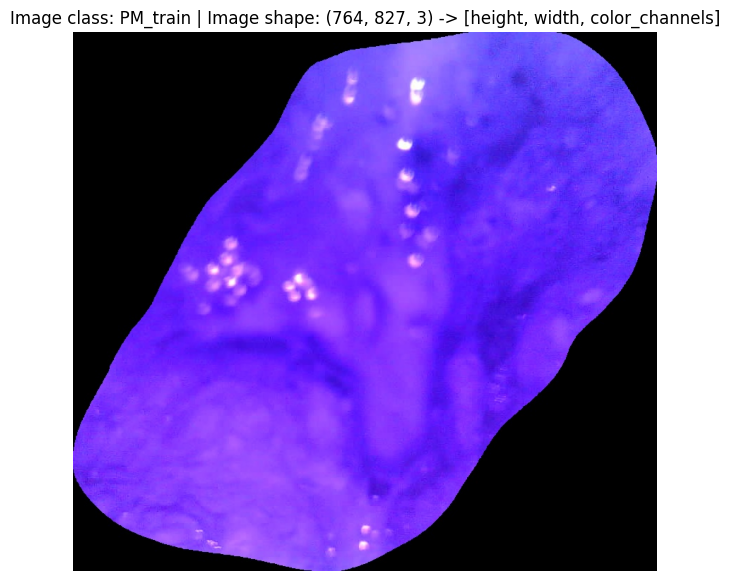

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(
    f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]"
)
plt.axis(False)

In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming Data for PyTorch

Before using image data with PyTorch, we need to:

1. **Convert images into tensors** (numerical representations).
2. **Create a `torch.utils.data.Dataset`** and a **`torch.utils.data.DataLoader`** for efficient data handling.

PyTorch provides pre-built datasets and dataloaders for different problem domains:

| Problem Space          | Pre-built Datasets and Functions   |
|------------------------|-------------------------------------|
| Vision                 | `torchvision.datasets`              |
| Audio                  | `torchaudio.datasets`               |
| Text                   | `torchtext.datasets`                |
| Recommendation System  | `torchrec.datasets`                 |

For vision tasks, use `torchvision.datasets` and `torchvision.transforms` to prepare data.

---

## Import Required Libraries

```python
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [16]:
# Write transform for image
data_transform = transforms.Compose(
    [
        # Resize the images to 64x64
        transforms.Resize(size=(64, 64)),
        # Flip the images randomly on the horizontal
        transforms.RandomHorizontalFlip(
            p=0.5
        ),  # p = probability of flip, 0.5 = 50% chance
        # Turn the image into a torch.Tensor
        transforms.ToTensor(),  # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
    ]
)

### Transforming data with torchvision.transforms
We've got folders of images but before we can use them with PyTorch, we need to convert them into tensors.

One of the ways we can do this is by using the torchvision.transforms module.

torchvision.transforms contains many pre-built methods for formatting images, turning them into tensors and even manipulating them for data augmentation (the practice of altering data to make it harder for a model to learn, we'll see this later on) purposes .

To get experience with torchvision.transforms, let's write a series of transform steps that:

Resize the images using transforms.Resize() (from about 512x512 to 64x64, the same shape as the images on the CNN Explainer website).
Flip our images randomly on the horizontal using transforms.RandomHorizontalFlip() (this could be considered a form of data augmentation because it will artificially change our image data).
Turn our images from a PIL image to a PyTorch tensor using transforms.ToTensor().
We can compile all of these steps using torchvision.transforms.Compose().

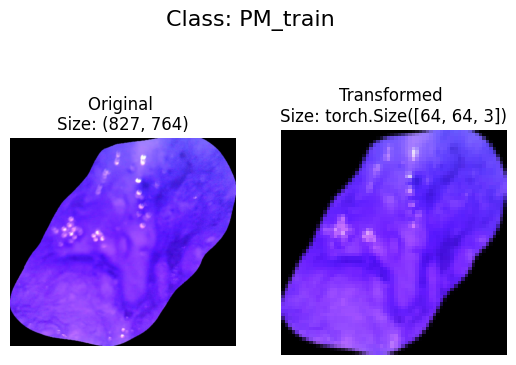

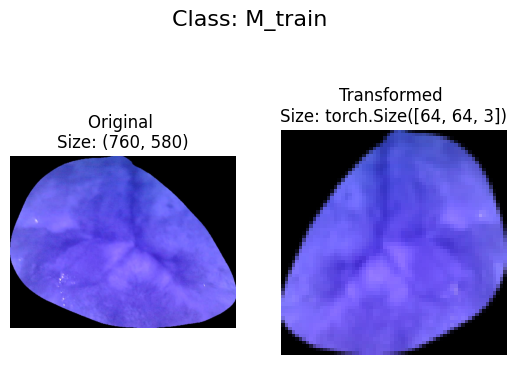

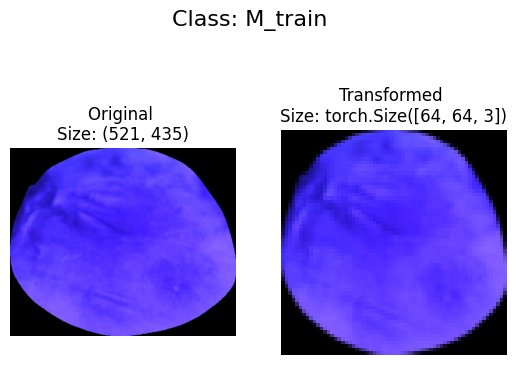

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [18]:
# Recall we alreday have our train and test directories ready .
train_dir, test_dir

('<built-in function getcwd>//train', '<built-in function getcwd>//test')

In [19]:
from torchvision import datasets

train_data = datasets.ImageFolder(
    root="train",  # target folder of images
    transform=data_transform,  # transforms to perform on data (images)
    target_transform=None,
)  # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root="test", transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 888
    Root location: train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 77
    Root location: test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [20]:
# Get class names as a list
class_names = train_data.classes
class_names

['M_train', 'NM_train', 'PM_train']

In [21]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


In [22]:
# Image shape: torch.Size([3, 64, 64])
# Image datatype: torch.float32
# Image label: 0
# Label datatype: <class 'int'>

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'M_train')

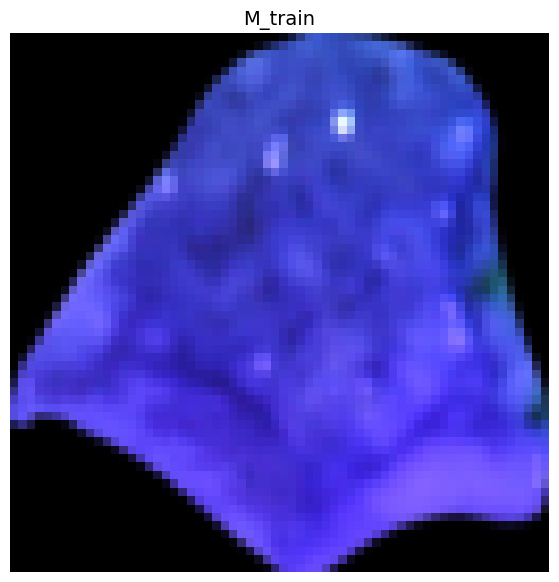

In [23]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### Creating Dataloaders from the Dataset

We've got our images as PyTorch Dataset's but now let's turn them into DataLoader's.

We'll do so using torch.utils.data.DataLoader.

Turning our Dataset's into DataLoader's makes them iterable so a model can go through and learn the relationships between samples and targets (features and labels).

In [24]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=12,  # how many samples per batch?
    num_workers=4,  # how many subprocesses to use for data loading? (higher = more)
    shuffle=True,
)  # shuffle the data?

test_dataloader = DataLoader(
    dataset=test_data, batch_size=2, num_workers=4, shuffle=False
)  # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1a841ca5a20>,
 <torch.utils.data.dataloader.DataLoader at 0x1a84a11db10>)

In [25]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([12, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([12])


 Create a function to display random images
You know what time it is!

Time to put on our data explorer's hat and visualize, visualize, visualize!

Let's create a helper function called display_random_images() that helps us visualize images in our Dataset's.

Specifically, it'll:

Take in a Dataset and a number of other parameters such as classes (the names of our target classes), the number of images to display (n) and a random seed.
To prevent the display getting out of hand, we'll cap n at 10 images.
Set the random seed for reproducible plots (if seed is set).
Get a list of random sample indexes (we can use Python's random.sample() for this) to plot.
Setup a matplotlib plot.
Loop through the random sample indexes found in step 4 and plot them with matplotlib.
Make sure the sample images are of shape HWC (height, width, color channels) so we can plot them.

In [26]:
import random
import matplotlib.pyplot as plt
from typing import List  # Required for type hints
import torch


def display_random_images(
    dataset: torch.utils.data.Dataset,
    classes: List[str] = None,
    n: int = 10,
    display_shape: bool = True,
    seed: int = None,
):
    """
    Displays n random images from a dataset with optional class labels.

    Parameters:
        dataset: PyTorch Dataset containing image tensors and labels
        classes: List of class names (optional)
        n: Number of images to display (max 10)
        display_shape: Whether to show image dimensions
        seed: Optional random seed for reproducibility
    """
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(
            "For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display."
        )

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust tensor dimensions for plotting: [C, H, W] -> [H, W, C]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i + 1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")

        # Set title with optional class label and shape
        title = ""
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title += f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

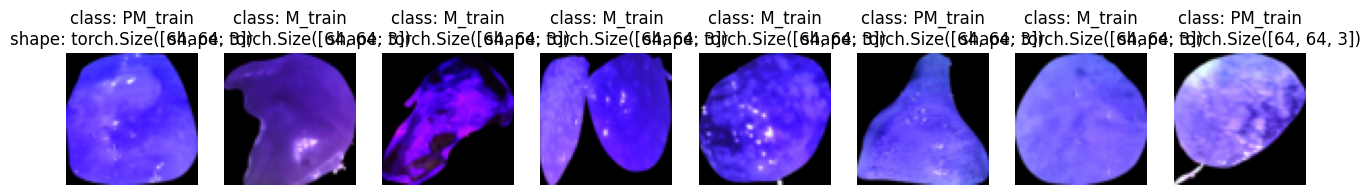

In [27]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, n=8, classes=class_names, seed=None)

We've seen a couple of transforms on our data already but there's plenty more.

You can see them all in the torchvision.transforms documentation.

The purpose of tranforms is to alter your images in some way.

That may be turning your images into a tensor (as we've seen before).

Or cropping it or randomly erasing a portion or randomly rotating them.

Doing these kinds of transforms is often referred to as data augmentation.

Data augmentation is the process of altering your data in such a way that you artificially increase the diversity of your training set.

Training a model on this artificially altered dataset hopefully results in a model that is capable of better generalization (the patterns it learns are more robust to future unseen examples).

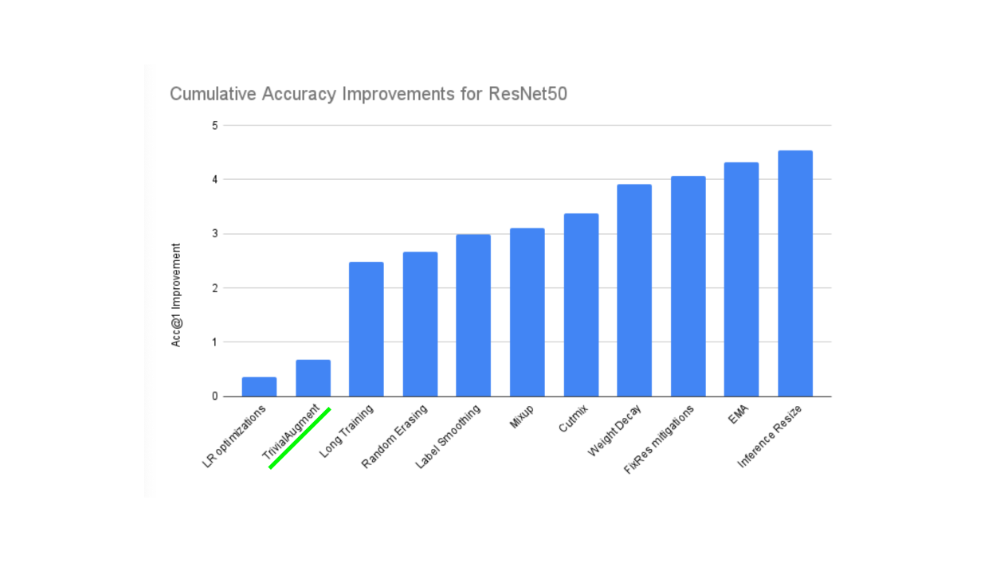

In [28]:
from PIL import Image

# Load image
pil_image = Image.open("image.png")

# Display image
pil_image.show()  # Opens in default system viewer

# For Jupyter Notebook inline display:
pil_image  # Just output the image object (no plt.show() needed)

TrivialAugment was one of the ingredients used in a recent state of the art training upgrade to various PyTorch vision models.

How about we test it out on some of our own images?

The main parameter to pay attention to in transforms.TrivialAugmentWide() is num_magnitude_bins=31.

It defines how much of a range an intensity value will be picked to apply a certain transform, 0 being no range and 31 being maximum range (highest chance for highest intensity).

We can incorporate transforms.TrivialAugmentWide() into transforms.Compose().

In [29]:
from torchvision import transforms

train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),  # how intense
        transforms.ToTensor(),  # use ToTensor() last to get everything between 0 & 1
    ]
)

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

In [30]:
image_path = "F:\Vision_based_transformers\Cancer_prediction_using_DNN\Codes-20250214T181209Z-001\Codes\Traning Data and Code\Blue_ROI\Buccal_Mucosa\train"

Model 0: TinyVGG without data augmentation
Alright, we've seen how to turn our data from images in folders to transformed tensors.

Now let's construct a computer vision model to see if we can classify if an image is of pizza, steak or sushi.

To begin, we'll start with a simple transform, only resizing the images to (64, 64) and turning them into tensors

In [31]:
# Create simple transform
simple_transform = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
    ]
)

### Now we've got a simple transform, let's:

Load the data, turning each of our training and test folders first into a Dataset with torchvision.datasets.ImageFolder()
Then into a DataLoader using torch.utils.data.DataLoader().
We'll set the batch_size=32 and num_workers to as many CPUs on our machine (this will depend on what machine you're using).

In [32]:
# 1. Load and transform data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root="train", transform=simple_transform)
test_data_simple = datasets.ImageFolder(root="test", transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 12
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(
    train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS
)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 12 and 12 workers.


(<torch.utils.data.dataloader.DataLoader at 0x1a848c13df0>,
 <torch.utils.data.dataloader.DataLoader at 0x1a848c13040>)

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# If using multiple GPUs, get the count
if torch.cuda.is_available():
    print(f"Number of GPUs available: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")

# Move a tensor to GPU
x = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(x)

Using device: cuda
Number of GPUs available: 1
GPU Name: NVIDIA GeForce GTX 1650
tensor([1., 2., 3.], device='cuda:0')


In [34]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,  # how big is the square that's going over the image?
                stride=1,  # default
                padding=1,
            ),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2, stride=2
            ),  # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion


torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape=3,  # number of color channels (3 for RGB)
    hidden_units=10,
    output_shape=len(train_data.classes),
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [35]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [36]:
from torchinfo import summary

In [37]:
summary(model_0)

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0

Try a forward pass on a single image (to test the model)
A good way to test a model is to do a forward pass on a single piece of data.

It's also handy way to test the input and output shapes of our different layers.

To do a forward pass on a single image, let's:

1. Get a batch of images and labels from the DataLoader.
2. Get a single image from the batch and unsqueeze() the image so it has a batch size of 1 (so its shape fits the model).
3. Perform inference on a single image (making sure to send the image to the target device).



Print out what's happening and convert the model's raw output logits to prediction probabilities with torch.softmax() (since we're working with multi-class data) and convert the prediction probabilities to prediction labels with torch.argmax().

In [38]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0570, 0.0578, 0.0353]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3357, 0.3359, 0.3284]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


Create train & test loop functions
We've got data and we've got a model.

Now let's make some training and test loop functions to train our model on the training data and evaluate our model on the testing data.

And to make sure we can use these the training and testing loops again, we'll functionize them.

Specifically, we're going to make three functions:

train_step() - takes in a model, a DataLoader, a loss function and an optimizer and trains the model on the DataLoader.
test_step() - takes in a model, a DataLoader and a loss function and evaluates the model on the DataLoader.
train() - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

In [39]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [40]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### Creating a train() function to combine train_step() and test_step()
Now we need a way to put our train_step() and test_step() functions together.

To do so, we'll package them up in a train() function.

This function will train the model as well as evaluate it.

Specificially, it'll:

1. Take in a model, a DataLoader for training and test sets, an optimizer, a loss function and how many epochs to perform each train and test step for.
2. Create an empty results dictionary for train_loss, train_acc, test_loss and test_acc values (we can fill this up as training goes on).
3. Loop through the training and test step functions for a number of epochs.
Print out what's happening at the end of each epoch.
4. Update the empty results dictionary with the updated metrics each epoch.
5. Return the filled



### To keep track of the number of epochs we've been through, let's import tqdm from tqdm.auto (tqdm is one of the most popular progress bar libraries for Python and tqdm.auto automatically decides what kind of progress bar is best for your computing environment, e.g. Jupyter Notebook vs. Python script).

In [41]:
from tqdm.auto import tqdm


# 1. Take in various parameters required for training and test steps
def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5,
):

    # 2. Create empty results dictionary
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
        )
        test_loss, test_acc = test_step(
            model=model, dataloader=test_dataloader, loss_fn=loss_fn
        )

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(
            train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss
        )
        results["train_acc"].append(
            train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc
        )
        results["test_loss"].append(
            test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss
        )
        results["test_acc"].append(
            test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc
        )

    # 6. Return the filled results at the end of the epochs
    return results

f:\PyTorch_GPU\torch_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train and Evaluate Model 0
Alright, alright, alright we've got all of the ingredients we need to train and evaluate our model.

Time to put our TinyVGG model, DataLoader's and train() function together to see if we can build a model capable of discerning between pizza, steak and sushi!

Let's recreate model_0 (we don't need to but we will for completeness) then call our train() function passing in the necessary parameters.

To keep our experiments quick, we'll train our model for 5 epochs (though you could increase this if you want).

As for an optimizer and loss function, we'll use torch.nn.CrossEntropyLoss() (since we're working with multi-class classification data) and torch.optim.Adam() with a learning rate of 1e-3 respectively.

To see how long things take, we'll import Python's timeit.default_timer() method to calculate the training time.

In [43]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100  # first time ran for 5 epochs , still performs better than model_1 at 15 eopochs.

# Recreate an instance of TinyVGG
model_0 = TinyVGG(
    input_shape=3,  # number of color channels (3 for RGB)
    hidden_units=10,
    output_shape=len(train_data.classes),
).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    params=model_0.parameters(), lr=0.0001, weight_decay=0.0075
)

# Start the timer
from timeit import default_timer as timer

start_time = timer()

# Train model_0
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [00:48<1:20:01, 48.50s/it]

Epoch: 1 | train_loss: 1.0901 | train_acc: 0.3784 | test_loss: 1.0782 | test_acc: 0.3571


  2%|▏         | 2/100 [01:31<1:13:41, 45.11s/it]

Epoch: 2 | train_loss: 1.0825 | train_acc: 0.3919 | test_loss: 1.0766 | test_acc: 0.3571


  3%|▎         | 3/100 [02:13<1:11:07, 43.99s/it]

Epoch: 3 | train_loss: 1.0663 | train_acc: 0.3919 | test_loss: 1.0553 | test_acc: 0.3571


  4%|▍         | 4/100 [03:03<1:13:48, 46.13s/it]

Epoch: 4 | train_loss: 1.0382 | train_acc: 0.4032 | test_loss: 1.0434 | test_acc: 0.3810


  5%|▌         | 5/100 [03:48<1:12:13, 45.61s/it]

Epoch: 5 | train_loss: 1.0102 | train_acc: 0.4730 | test_loss: 1.0242 | test_acc: 0.4881


  6%|▌         | 6/100 [04:28<1:08:34, 43.77s/it]

Epoch: 6 | train_loss: 0.9735 | train_acc: 0.5124 | test_loss: 1.0099 | test_acc: 0.4071


  7%|▋         | 7/100 [05:15<1:09:38, 44.93s/it]

Epoch: 7 | train_loss: 0.9447 | train_acc: 0.5068 | test_loss: 0.9756 | test_acc: 0.4071


  8%|▊         | 8/100 [06:07<1:12:18, 47.16s/it]

Epoch: 8 | train_loss: 0.9210 | train_acc: 0.5045 | test_loss: 0.9282 | test_acc: 0.5595


  9%|▉         | 9/100 [07:08<1:17:57, 51.40s/it]

Epoch: 9 | train_loss: 0.9155 | train_acc: 0.5079 | test_loss: 0.9153 | test_acc: 0.4429


 10%|█         | 10/100 [07:52<1:13:46, 49.18s/it]

Epoch: 10 | train_loss: 0.8929 | train_acc: 0.5372 | test_loss: 0.8762 | test_acc: 0.6333


 11%|█         | 11/100 [08:38<1:11:37, 48.29s/it]

Epoch: 11 | train_loss: 0.8814 | train_acc: 0.5428 | test_loss: 0.8902 | test_acc: 0.4786


 12%|█▏        | 12/100 [09:23<1:09:22, 47.31s/it]

Epoch: 12 | train_loss: 0.8738 | train_acc: 0.5619 | test_loss: 0.8734 | test_acc: 0.6095


 13%|█▎        | 13/100 [10:08<1:07:33, 46.60s/it]

Epoch: 13 | train_loss: 0.8739 | train_acc: 0.5608 | test_loss: 0.8796 | test_acc: 0.5500


 14%|█▍        | 14/100 [10:49<1:04:10, 44.77s/it]

Epoch: 14 | train_loss: 0.8617 | train_acc: 0.5529 | test_loss: 0.9209 | test_acc: 0.4190


 15%|█▌        | 15/100 [11:35<1:04:09, 45.29s/it]

Epoch: 15 | train_loss: 0.8527 | train_acc: 0.5631 | test_loss: 0.8687 | test_acc: 0.6214


 16%|█▌        | 16/100 [12:20<1:03:14, 45.17s/it]

Epoch: 16 | train_loss: 0.8527 | train_acc: 0.5664 | test_loss: 0.8689 | test_acc: 0.5429


 17%|█▋        | 17/100 [13:18<1:07:52, 49.06s/it]

Epoch: 17 | train_loss: 0.8457 | train_acc: 0.5800 | test_loss: 0.8562 | test_acc: 0.5976


 18%|█▊        | 18/100 [14:13<1:09:27, 50.83s/it]

Epoch: 18 | train_loss: 0.8402 | train_acc: 0.5878 | test_loss: 0.8740 | test_acc: 0.4857


 19%|█▉        | 19/100 [15:07<1:09:50, 51.73s/it]

Epoch: 19 | train_loss: 0.8378 | train_acc: 0.5957 | test_loss: 0.8495 | test_acc: 0.5286


 20%|██        | 20/100 [15:53<1:06:36, 49.95s/it]

Epoch: 20 | train_loss: 0.8217 | train_acc: 0.6059 | test_loss: 0.8701 | test_acc: 0.5143


 21%|██        | 21/100 [16:49<1:08:18, 51.87s/it]

Epoch: 21 | train_loss: 0.8187 | train_acc: 0.5980 | test_loss: 0.8674 | test_acc: 0.5262


 22%|██▏       | 22/100 [17:42<1:07:56, 52.26s/it]

Epoch: 22 | train_loss: 0.8180 | train_acc: 0.6059 | test_loss: 0.8456 | test_acc: 0.5048


 23%|██▎       | 23/100 [18:21<1:01:59, 48.30s/it]

Epoch: 23 | train_loss: 0.8174 | train_acc: 0.5935 | test_loss: 0.8541 | test_acc: 0.5429


 24%|██▍       | 24/100 [19:00<57:37, 45.50s/it]  

Epoch: 24 | train_loss: 0.8018 | train_acc: 0.6081 | test_loss: 0.8296 | test_acc: 0.5524


 25%|██▌       | 25/100 [19:39<54:22, 43.50s/it]

Epoch: 25 | train_loss: 0.8059 | train_acc: 0.5935 | test_loss: 0.8321 | test_acc: 0.4929


 26%|██▌       | 26/100 [20:20<52:40, 42.71s/it]

Epoch: 26 | train_loss: 0.7950 | train_acc: 0.6002 | test_loss: 0.8326 | test_acc: 0.5095


 27%|██▋       | 27/100 [21:05<52:50, 43.44s/it]

Epoch: 27 | train_loss: 0.7991 | train_acc: 0.6059 | test_loss: 0.8210 | test_acc: 0.5405


 28%|██▊       | 28/100 [21:51<53:02, 44.20s/it]

Epoch: 28 | train_loss: 0.7859 | train_acc: 0.6227 | test_loss: 0.8478 | test_acc: 0.5024


 29%|██▉       | 29/100 [22:35<52:20, 44.24s/it]

Epoch: 29 | train_loss: 0.7880 | train_acc: 0.6261 | test_loss: 0.8425 | test_acc: 0.5143


 30%|███       | 30/100 [23:21<52:09, 44.70s/it]

Epoch: 30 | train_loss: 0.7802 | train_acc: 0.6340 | test_loss: 0.8294 | test_acc: 0.5262


 31%|███       | 31/100 [24:07<51:49, 45.06s/it]

Epoch: 31 | train_loss: 0.7763 | train_acc: 0.6250 | test_loss: 0.8420 | test_acc: 0.5262


 32%|███▏      | 32/100 [24:47<49:11, 43.40s/it]

Epoch: 32 | train_loss: 0.7751 | train_acc: 0.6227 | test_loss: 0.8317 | test_acc: 0.5143


 33%|███▎      | 33/100 [25:35<50:11, 44.95s/it]

Epoch: 33 | train_loss: 0.7665 | train_acc: 0.6419 | test_loss: 0.8211 | test_acc: 0.5095


 34%|███▍      | 34/100 [26:21<49:48, 45.28s/it]

Epoch: 34 | train_loss: 0.7690 | train_acc: 0.6261 | test_loss: 0.8152 | test_acc: 0.6286


 35%|███▌      | 35/100 [27:07<49:02, 45.26s/it]

Epoch: 35 | train_loss: 0.7750 | train_acc: 0.6295 | test_loss: 0.8426 | test_acc: 0.5667


 36%|███▌      | 36/100 [27:45<46:03, 43.18s/it]

Epoch: 36 | train_loss: 0.7644 | train_acc: 0.6363 | test_loss: 0.8120 | test_acc: 0.6405


 37%|███▋      | 37/100 [28:22<43:34, 41.50s/it]

Epoch: 37 | train_loss: 0.7567 | train_acc: 0.6408 | test_loss: 0.8042 | test_acc: 0.5500


 38%|███▊      | 38/100 [29:00<41:34, 40.23s/it]

Epoch: 38 | train_loss: 0.7512 | train_acc: 0.6160 | test_loss: 0.7890 | test_acc: 0.5214


 39%|███▉      | 39/100 [29:41<41:11, 40.51s/it]

Epoch: 39 | train_loss: 0.7500 | train_acc: 0.6498 | test_loss: 0.8049 | test_acc: 0.5738


 40%|████      | 40/100 [30:21<40:18, 40.31s/it]

Epoch: 40 | train_loss: 0.7484 | train_acc: 0.6554 | test_loss: 0.8481 | test_acc: 0.4500


 41%|████      | 41/100 [31:01<39:31, 40.20s/it]

Epoch: 41 | train_loss: 0.7477 | train_acc: 0.6486 | test_loss: 0.7902 | test_acc: 0.5500


 42%|████▏     | 42/100 [31:39<38:25, 39.75s/it]

Epoch: 42 | train_loss: 0.7420 | train_acc: 0.6374 | test_loss: 0.8064 | test_acc: 0.5548


 43%|████▎     | 43/100 [32:20<37:58, 39.97s/it]

Epoch: 43 | train_loss: 0.7333 | train_acc: 0.6520 | test_loss: 0.8144 | test_acc: 0.5738


 44%|████▍     | 44/100 [33:04<38:29, 41.24s/it]

Epoch: 44 | train_loss: 0.7329 | train_acc: 0.6554 | test_loss: 0.8110 | test_acc: 0.5262


 45%|████▌     | 45/100 [33:47<38:22, 41.87s/it]

Epoch: 45 | train_loss: 0.7317 | train_acc: 0.6836 | test_loss: 0.7901 | test_acc: 0.5738


 46%|████▌     | 46/100 [34:31<38:14, 42.49s/it]

Epoch: 46 | train_loss: 0.7254 | train_acc: 0.6520 | test_loss: 0.8375 | test_acc: 0.4952


 47%|████▋     | 47/100 [35:10<36:34, 41.41s/it]

Epoch: 47 | train_loss: 0.7254 | train_acc: 0.6655 | test_loss: 0.7881 | test_acc: 0.5738


 48%|████▊     | 48/100 [35:57<37:24, 43.16s/it]

Epoch: 48 | train_loss: 0.7129 | train_acc: 0.6633 | test_loss: 0.8561 | test_acc: 0.5476


 49%|████▉     | 49/100 [36:47<38:11, 44.92s/it]

Epoch: 49 | train_loss: 0.7367 | train_acc: 0.6363 | test_loss: 0.7597 | test_acc: 0.5500


 50%|█████     | 50/100 [37:40<39:35, 47.52s/it]

Epoch: 50 | train_loss: 0.7250 | train_acc: 0.6689 | test_loss: 0.7815 | test_acc: 0.6024


 51%|█████     | 51/100 [38:42<42:20, 51.86s/it]

Epoch: 51 | train_loss: 0.7071 | train_acc: 0.6678 | test_loss: 0.7505 | test_acc: 0.5500


 52%|█████▏    | 52/100 [39:38<42:32, 53.17s/it]

Epoch: 52 | train_loss: 0.7032 | train_acc: 0.6655 | test_loss: 0.7442 | test_acc: 0.5500


 53%|█████▎    | 53/100 [40:29<41:05, 52.46s/it]

Epoch: 53 | train_loss: 0.6956 | train_acc: 0.6667 | test_loss: 0.7577 | test_acc: 0.5619


 54%|█████▍    | 54/100 [41:22<40:16, 52.53s/it]

Epoch: 54 | train_loss: 0.7055 | train_acc: 0.6667 | test_loss: 0.7353 | test_acc: 0.6167


 55%|█████▌    | 55/100 [42:03<36:52, 49.18s/it]

Epoch: 55 | train_loss: 0.6905 | train_acc: 0.6768 | test_loss: 0.7462 | test_acc: 0.5738


 56%|█████▌    | 56/100 [42:44<34:16, 46.74s/it]

Epoch: 56 | train_loss: 0.6868 | train_acc: 0.6903 | test_loss: 0.7321 | test_acc: 0.5929


 57%|█████▋    | 57/100 [43:26<32:20, 45.13s/it]

Epoch: 57 | train_loss: 0.6726 | train_acc: 0.6914 | test_loss: 0.7538 | test_acc: 0.5667


 58%|█████▊    | 58/100 [44:08<31:05, 44.42s/it]

Epoch: 58 | train_loss: 0.6869 | train_acc: 0.6779 | test_loss: 0.7335 | test_acc: 0.5738


 59%|█████▉    | 59/100 [44:49<29:34, 43.29s/it]

Epoch: 59 | train_loss: 0.6699 | train_acc: 0.6914 | test_loss: 0.7261 | test_acc: 0.5929


 60%|██████    | 60/100 [45:31<28:31, 42.80s/it]

Epoch: 60 | train_loss: 0.6656 | train_acc: 0.7061 | test_loss: 0.7323 | test_acc: 0.5738


 61%|██████    | 61/100 [46:11<27:25, 42.19s/it]

Epoch: 61 | train_loss: 0.6602 | train_acc: 0.7038 | test_loss: 0.7785 | test_acc: 0.5810


 62%|██████▏   | 62/100 [46:53<26:33, 41.94s/it]

Epoch: 62 | train_loss: 0.6636 | train_acc: 0.6869 | test_loss: 0.7689 | test_acc: 0.5786


 63%|██████▎   | 63/100 [47:34<25:42, 41.69s/it]

Epoch: 63 | train_loss: 0.6615 | train_acc: 0.7005 | test_loss: 0.7612 | test_acc: 0.5667


 64%|██████▍   | 64/100 [48:15<24:53, 41.48s/it]

Epoch: 64 | train_loss: 0.6524 | train_acc: 0.7027 | test_loss: 0.7327 | test_acc: 0.6024


 65%|██████▌   | 65/100 [48:57<24:17, 41.65s/it]

Epoch: 65 | train_loss: 0.6452 | train_acc: 0.7083 | test_loss: 0.7238 | test_acc: 0.6143


 66%|██████▌   | 66/100 [49:38<23:30, 41.47s/it]

Epoch: 66 | train_loss: 0.6578 | train_acc: 0.7072 | test_loss: 0.7251 | test_acc: 0.6214


 67%|██████▋   | 67/100 [50:19<22:40, 41.24s/it]

Epoch: 67 | train_loss: 0.6446 | train_acc: 0.6993 | test_loss: 0.7294 | test_acc: 0.5786


 68%|██████▊   | 68/100 [51:00<21:58, 41.19s/it]

Epoch: 68 | train_loss: 0.6419 | train_acc: 0.7050 | test_loss: 0.7338 | test_acc: 0.5810


 69%|██████▉   | 69/100 [51:41<21:20, 41.29s/it]

Epoch: 69 | train_loss: 0.6402 | train_acc: 0.7061 | test_loss: 0.8172 | test_acc: 0.5429


 70%|███████   | 70/100 [52:22<20:31, 41.05s/it]

Epoch: 70 | train_loss: 0.6390 | train_acc: 0.6971 | test_loss: 0.7549 | test_acc: 0.5786


 71%|███████   | 71/100 [53:03<19:51, 41.08s/it]

Epoch: 71 | train_loss: 0.6291 | train_acc: 0.7128 | test_loss: 0.7175 | test_acc: 0.6333


 72%|███████▏  | 72/100 [53:45<19:14, 41.24s/it]

Epoch: 72 | train_loss: 0.6311 | train_acc: 0.7173 | test_loss: 0.7624 | test_acc: 0.5667


 73%|███████▎  | 73/100 [54:25<18:28, 41.07s/it]

Epoch: 73 | train_loss: 0.6237 | train_acc: 0.7264 | test_loss: 0.7199 | test_acc: 0.6024


 74%|███████▍  | 74/100 [55:06<17:48, 41.11s/it]

Epoch: 74 | train_loss: 0.6254 | train_acc: 0.7218 | test_loss: 0.7435 | test_acc: 0.5857


 75%|███████▌  | 75/100 [55:47<17:05, 41.01s/it]

Epoch: 75 | train_loss: 0.6301 | train_acc: 0.7264 | test_loss: 0.6948 | test_acc: 0.6500


 76%|███████▌  | 76/100 [56:28<16:24, 41.04s/it]

Epoch: 76 | train_loss: 0.6163 | train_acc: 0.7196 | test_loss: 0.7536 | test_acc: 0.5548


 77%|███████▋  | 77/100 [57:10<15:45, 41.12s/it]

Epoch: 77 | train_loss: 0.6131 | train_acc: 0.7241 | test_loss: 0.7088 | test_acc: 0.6381


 78%|███████▊  | 78/100 [57:50<15:02, 41.02s/it]

Epoch: 78 | train_loss: 0.6014 | train_acc: 0.7264 | test_loss: 0.7204 | test_acc: 0.6333


 79%|███████▉  | 79/100 [58:32<14:24, 41.15s/it]

Epoch: 79 | train_loss: 0.5989 | train_acc: 0.7241 | test_loss: 0.6869 | test_acc: 0.6619


 80%|████████  | 80/100 [59:13<13:42, 41.13s/it]

Epoch: 80 | train_loss: 0.6026 | train_acc: 0.7151 | test_loss: 0.7090 | test_acc: 0.6143


 81%|████████  | 81/100 [59:54<12:59, 41.03s/it]

Epoch: 81 | train_loss: 0.5926 | train_acc: 0.7309 | test_loss: 0.6916 | test_acc: 0.5881


 82%|████████▏ | 82/100 [1:00:35<12:19, 41.06s/it]

Epoch: 82 | train_loss: 0.5894 | train_acc: 0.7297 | test_loss: 0.7713 | test_acc: 0.6095


 83%|████████▎ | 83/100 [1:01:16<11:40, 41.21s/it]

Epoch: 83 | train_loss: 0.6058 | train_acc: 0.7207 | test_loss: 0.6795 | test_acc: 0.6619


 84%|████████▍ | 84/100 [1:01:59<11:04, 41.54s/it]

Epoch: 84 | train_loss: 0.6090 | train_acc: 0.7151 | test_loss: 0.6932 | test_acc: 0.6262


 85%|████████▌ | 85/100 [1:02:40<10:22, 41.48s/it]

Epoch: 85 | train_loss: 0.5835 | train_acc: 0.7432 | test_loss: 0.6922 | test_acc: 0.6381


 86%|████████▌ | 86/100 [1:03:21<09:38, 41.32s/it]

Epoch: 86 | train_loss: 0.5839 | train_acc: 0.7286 | test_loss: 0.6915 | test_acc: 0.6262


 87%|████████▋ | 87/100 [1:04:03<08:57, 41.38s/it]

Epoch: 87 | train_loss: 0.5841 | train_acc: 0.7342 | test_loss: 0.7230 | test_acc: 0.5905


 88%|████████▊ | 88/100 [1:04:44<08:15, 41.30s/it]

Epoch: 88 | train_loss: 0.5710 | train_acc: 0.7387 | test_loss: 0.7257 | test_acc: 0.5881


 89%|████████▉ | 89/100 [1:05:24<07:32, 41.15s/it]

Epoch: 89 | train_loss: 0.5725 | train_acc: 0.7365 | test_loss: 0.6757 | test_acc: 0.6524


 90%|█████████ | 90/100 [1:06:05<06:50, 41.01s/it]

Epoch: 90 | train_loss: 0.5786 | train_acc: 0.7275 | test_loss: 0.6988 | test_acc: 0.5905


 91%|█████████ | 91/100 [1:06:47<06:11, 41.29s/it]

Epoch: 91 | train_loss: 0.5597 | train_acc: 0.7410 | test_loss: 0.7293 | test_acc: 0.5762


 92%|█████████▏| 92/100 [1:07:28<05:28, 41.12s/it]

Epoch: 92 | train_loss: 0.5701 | train_acc: 0.7399 | test_loss: 0.7014 | test_acc: 0.5905


 93%|█████████▎| 93/100 [1:08:09<04:47, 41.01s/it]

Epoch: 93 | train_loss: 0.5635 | train_acc: 0.7331 | test_loss: 0.6880 | test_acc: 0.6571


 94%|█████████▍| 94/100 [1:08:50<04:07, 41.20s/it]

Epoch: 94 | train_loss: 0.5538 | train_acc: 0.7477 | test_loss: 0.6850 | test_acc: 0.6262


 95%|█████████▌| 95/100 [1:09:31<03:24, 40.98s/it]

Epoch: 95 | train_loss: 0.5569 | train_acc: 0.7331 | test_loss: 0.7439 | test_acc: 0.6071


 96%|█████████▌| 96/100 [1:10:17<02:50, 42.56s/it]

Epoch: 96 | train_loss: 0.5486 | train_acc: 0.7523 | test_loss: 0.6935 | test_acc: 0.6857


 97%|█████████▋| 97/100 [1:10:58<02:06, 42.11s/it]

Epoch: 97 | train_loss: 0.5476 | train_acc: 0.7432 | test_loss: 0.8256 | test_acc: 0.5929


 98%|█████████▊| 98/100 [1:11:40<01:23, 41.96s/it]

Epoch: 98 | train_loss: 0.5502 | train_acc: 0.7658 | test_loss: 0.6967 | test_acc: 0.6095


 99%|█████████▉| 99/100 [1:12:22<00:41, 41.96s/it]

Epoch: 99 | train_loss: 0.5506 | train_acc: 0.7455 | test_loss: 0.6795 | test_acc: 0.6048


100%|██████████| 100/100 [1:13:03<00:00, 43.83s/it]

Epoch: 100 | train_loss: 0.5485 | train_acc: 0.7399 | test_loss: 0.7567 | test_acc: 0.6143
Total training time: 4382.983 seconds


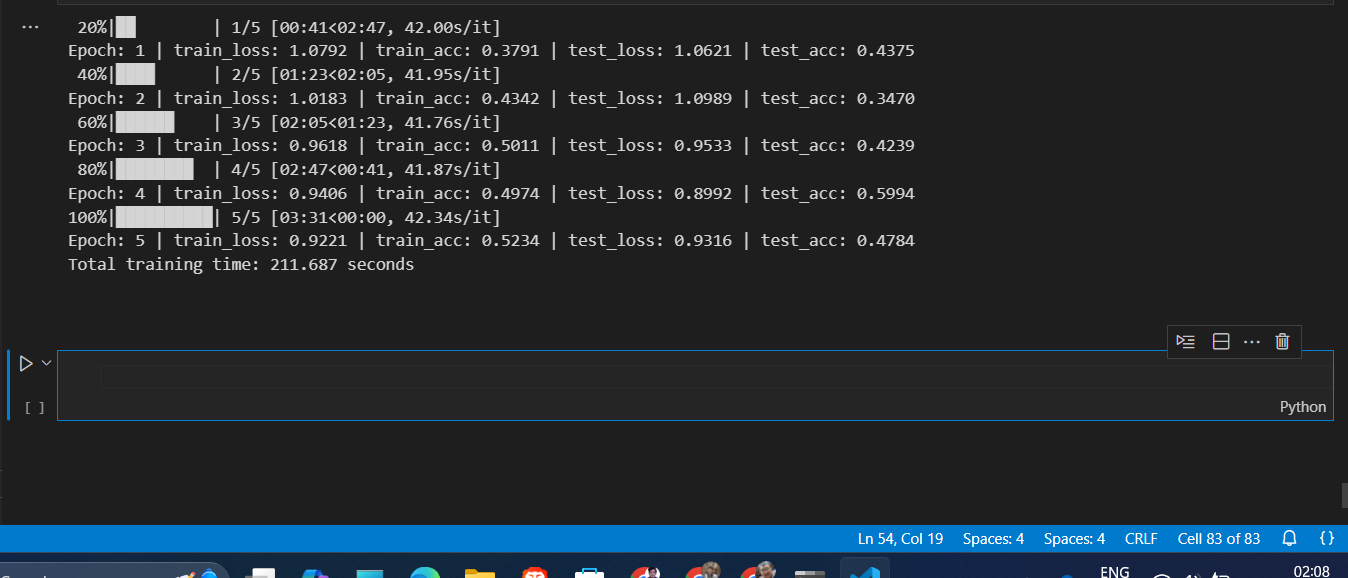

In [49]:
pil_image_2 = Image.open("first_traiing_5_epochs.png")
pil_image_2.show()
pil_image_2

In [50]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [51]:
from typing import Dict, List


def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

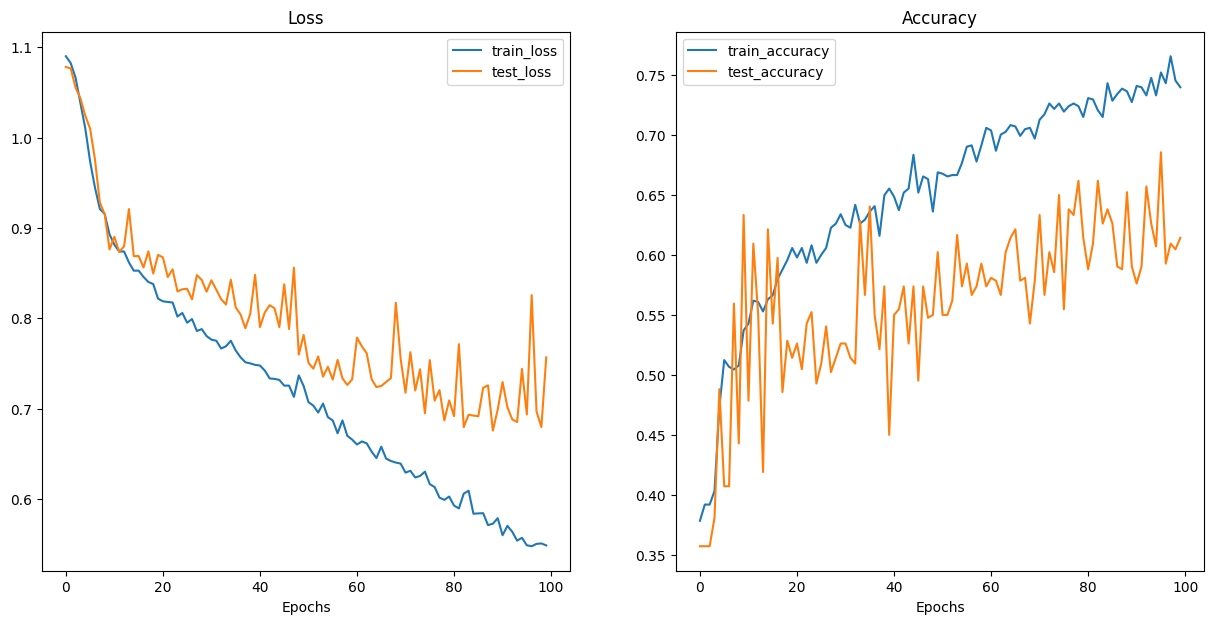

In [52]:
plot_loss_curves(model_0_results)

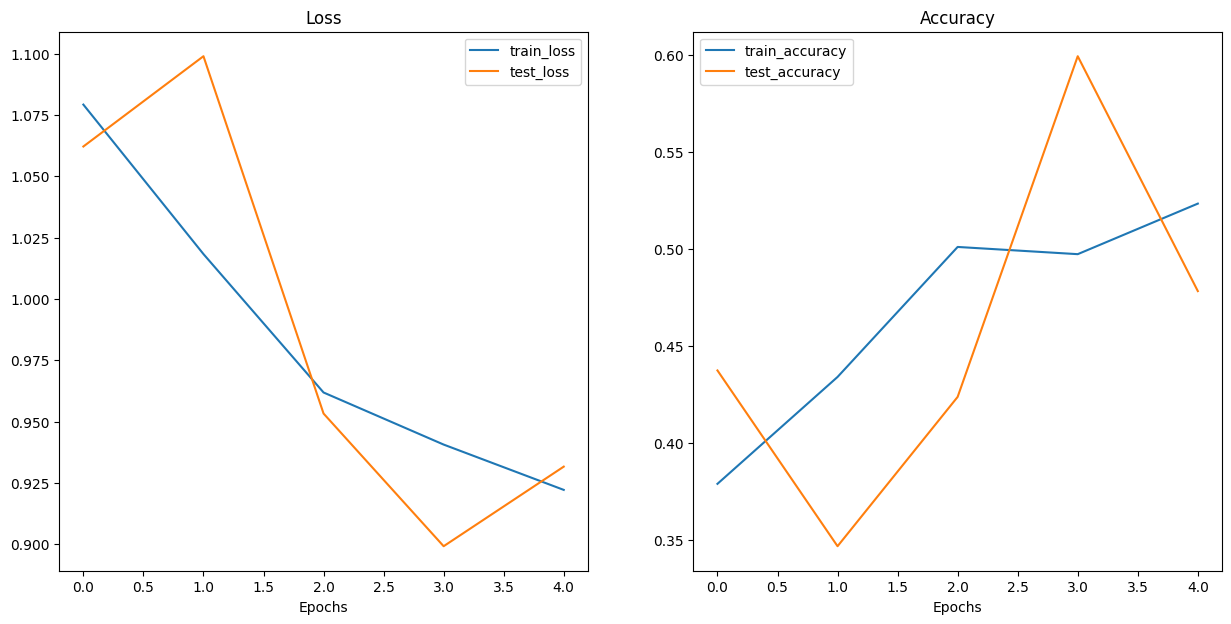

In [53]:
# Zeroth Training Pics
zeroth_training_pic = Image.open("zeroth_training_results.png")
zeroth_training_pic

Plot the loss curves of Model 0
From the print outs of our model_0 training, it didn't look like it did too well.

But we can further evaluate it by plotting the model's loss curves.

Loss curves show the model's results over time.

And they're a great way to see how your model performs on different datasets (e.g. training and test).

Let's create a function to plot the values in our model_0_results dictionary.

### Model 1: TinyVGG with Data Augmentation
Time to try out another model!

This time, let's load in the data and use data augmentation to see if it improves our results in anyway.

First, we'll compose a training transform to include transforms.TrivialAugmentWide() as well as resize and turn our images into tensors.

We'll do the same for a testing transform except without the data augmentation.

In [54]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor(),
    ]
)

# Create testing transform (no data augmentation)
test_transform = transforms.Compose(
    [transforms.Resize((64, 64)), transforms.ToTensor()]
)

Create transform with data augmentation

In [55]:
from torchvision import datasets

# Create training dataset with data augmentation
train_data_augmented = datasets.ImageFolder(
    root="train",  # Correct parameter name (not train_dir)
    transform=train_transform_trivial_augment,
)

# Create test dataset with simple transform
test_data_simple = datasets.ImageFolder(
    root="test", transform=test_transform  # Correct parameter name (not test_dir)
)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 888
     Root location: train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 77
     Root location: test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [56]:
import os

BATCH_SIZE = 12
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(
    train_data_augmented, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS
)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1a848b371c0>,
 <torch.utils.data.dataloader.DataLoader at 0x1a84a11db10>)

### Construct and train Model 1


------------------------Data loaded!---------------------

Now to build our next model, model_1, we can reuse our TinyVGG class from before.

We'll make sure to send it to the target device.

In [57]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3, hidden_units=10, output_shape=len(train_data_augmented.classes)
).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### Model ready!

Time to train!

Since we've already got functions for the training loop (train_step()) and testing loop (test_step()) and a function to put them together in train(), let's reuse those.

We'll use the same setup as model_0 with only the train_dataloader parameter varying:

In [60]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model_1.parameters(), lr=0.0012, weight_decay=0.02)

# Start the timer
from timeit import default_timer as timer

start_time = timer()

# Train model_1
model_1_results = train(
    model=model_1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [00:21<35:59, 21.82s/it]

Epoch: 1 | train_loss: 0.6182 | train_acc: 0.7309 | test_loss: 0.8664 | test_acc: 0.5524


  1%|          | 1/100 [00:28<46:34, 28.23s/it]


KeyboardInterrupt: 

In [108]:
print(f"CUDA is available: {torch.cuda.is_available()}")

CUDA is available: True



### Use FastAI's LR Finder
If you have fastai, you can use:


from fastai.vision.all import *
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), opt_func=SGD)
learn.lr_find()


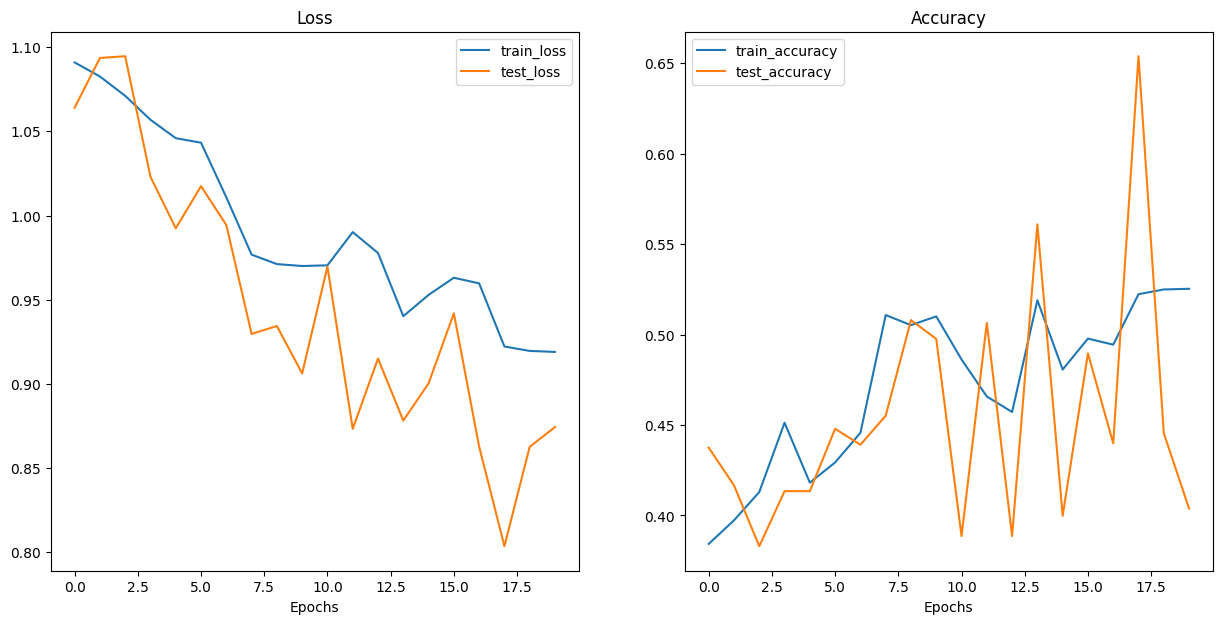

In [ ]:
plot_loss_curves(model_1_results)

In [61]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.090106,0.378378,1.078179,0.357143
1,1.082462,0.391892,1.076623,0.357143
2,1.066283,0.391892,1.055347,0.357143
3,1.038165,0.403153,1.043430,0.380952
4,1.010222,0.472973,1.024245,0.488095
...,...,...,...,...
95,0.548622,0.752252,0.693475,0.685714
96,0.547569,0.743243,0.825621,0.592857
97,0.550169,0.765766,0.696662,0.609524
98,0.550644,0.745495,0.679520,0.604762


In [62]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.094866,0.368243,1.082837,0.357143
1,1.071382,0.399775,1.101943,0.273810
2,1.035666,0.460586,0.986970,0.547619
3,1.040426,0.421171,0.953710,0.571429
4,1.032234,0.453829,1.031325,0.392857
...,...,...,...,...
95,0.572647,0.762387,0.842315,0.576190
96,0.603068,0.747748,0.941164,0.552381
97,0.568903,0.760135,0.859368,0.504762
98,0.570404,0.771396,1.025707,0.523810


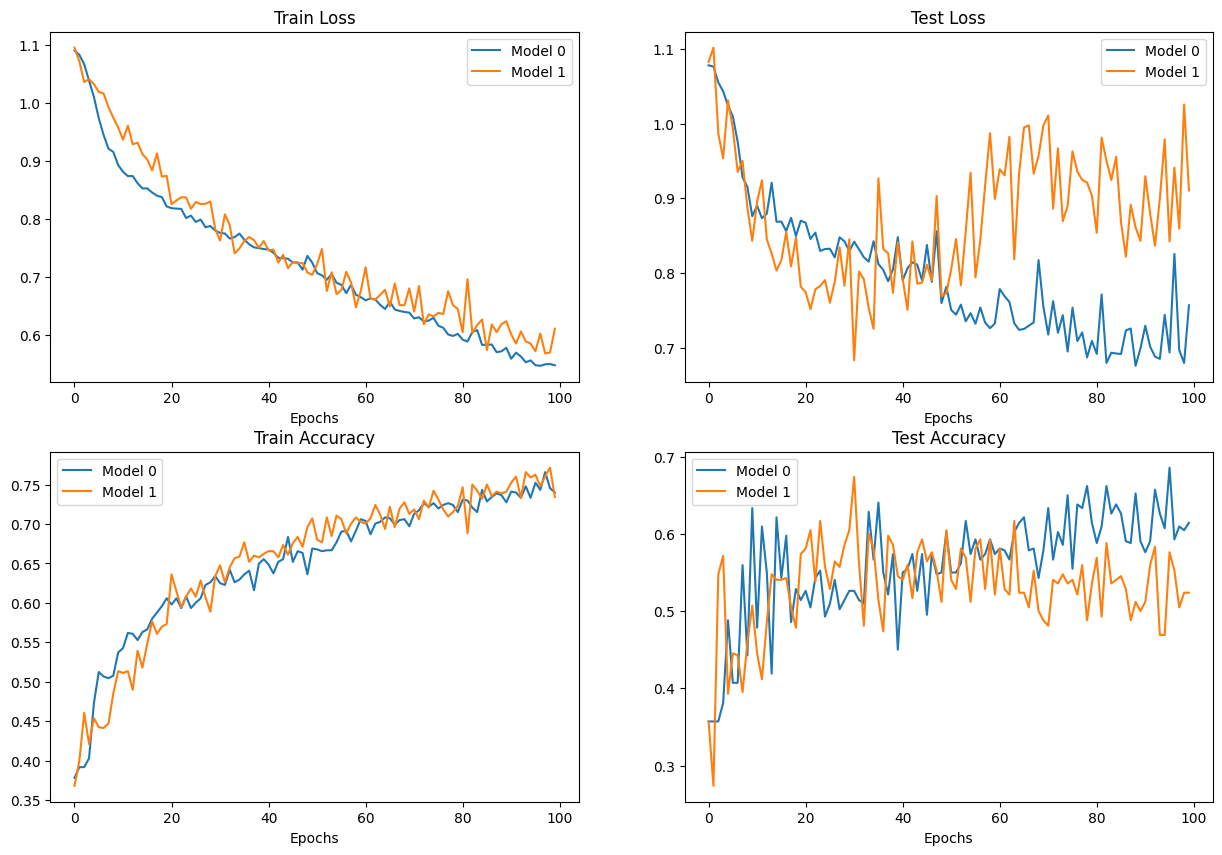

In [63]:
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

PyTorch's torchvision has several input and output ("IO" or "io" for short) methods for reading and writing images and video in torchvision.io.

Since we want to load in an image, we'll use torchvision.io.read_image().

This method will read a JPEG or PNG image and turn it into a 3 dimensional RGB or grayscale torch.Tensor with values of datatype uint8 in range [0, 255].

In [64]:
import torchvision

custom_image_path = "test\M_test\\288_L_b_3.jpg"
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[  0,   0,   0,  ...,  84,  84,  83],
         [  0,   0,   0,  ...,  84,  84,  83],
         [  0,   0,   0,  ...,  83,  83,  83],
         ...,
         [  0,   0,   0,  ...,  91,  88,  87],
         [  0,   0,   0,  ...,  91,  86,  86],
         [  0,   0,   0,  ...,  90,  85,  85]],

        [[  0,   0,   0,  ...,  80,  80,  79],
         [  0,   0,   0,  ...,  80,  80,  79],
         [  0,   0,   0,  ...,  81,  80,  80],
         ...,
         [  0,   0,   0,  ...,  61,  58,  56],
         [  0,   0,   0,  ...,  61,  56,  55],
         [  0,   0,   0,  ...,  60,  55,  54]],

        [[  0,   0,   0,  ..., 255, 255, 254],
         [  0,   0,   0,  ..., 255, 255, 254],
         [  0,   0,   0,  ..., 253, 255, 255],
         ...,
         [  0,   0,   0,  ..., 255, 254, 255],
         [  0,   0,   0,  ..., 255, 252, 254],
         [  0,   0,   0,  ..., 254, 251, 253]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 767, 672])

Custom image dtype

In [65]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.0

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.3294, 0.3294, 0.3255],
         [0.0000, 0.0000, 0.0000,  ..., 0.3294, 0.3294, 0.3255],
         [0.0000, 0.0000, 0.0000,  ..., 0.3255, 0.3255, 0.3255],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3451, 0.3412],
         [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3373, 0.3373],
         [0.0000, 0.0000, 0.0000,  ..., 0.3529, 0.3333, 0.3333]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.3137, 0.3137, 0.3098],
         [0.0000, 0.0000, 0.0000,  ..., 0.3137, 0.3137, 0.3098],
         [0.0000, 0.0000, 0.0000,  ..., 0.3176, 0.3137, 0.3137],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.2392, 0.2275, 0.2196],
         [0.0000, 0.0000, 0.0000,  ..., 0.2392, 0.2196, 0.2157],
         [0.0000, 0.0000, 0.0000,  ..., 0.2353, 0.2157, 0.2118]],

        [[0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 0.9961],
         [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 0.9961],
         [0.0000, 0.0000, 0.0000,  ..

### Predicting on custom images with a trained PyTorch model

(np.float64(-0.5), np.float64(671.5), np.float64(766.5), np.float64(-0.5))

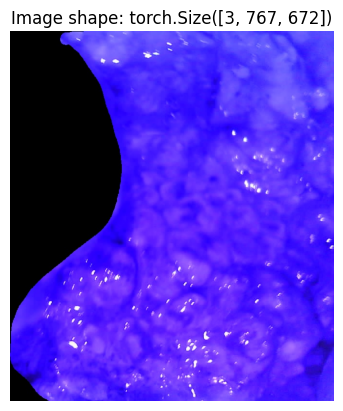

In [66]:
# Plot custom image
plt.imshow(
    custom_image.permute(1, 2, 0)
)  # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [67]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose(
    [
        transforms.Resize((64, 64)),
    ]
)

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 767, 672])
New shape: torch.Size([3, 64, 64])


### Lets put Our Model to Evaluation Mode

### Evaluation for base Model : model_0

In [68]:
model_0.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(
        f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}"
    )

    # Make a prediction on image with an extra dimension as batch size
    custom_image_pred_0 = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [69]:
custom_image_pred_0

tensor([[ 1.8060, -9.2809,  1.1206]], device='cuda:0')

### Evaluation for first model on top of second model : model_1

In [70]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(
        f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}"
    )

    # Make a prediction on image with an extra dimension
    custom_image_pred_1 = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [71]:
custom_image_pred_1

tensor([[ 0.1489, -4.7088,  0.5900]], device='cuda:0')

In [72]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred_1}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs_1 = torch.softmax(custom_image_pred_1, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs_1}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label_1 = torch.argmax(custom_image_pred_probs_1, dim=1)
print(f"Prediction label: {custom_image_pred_label_1}")

Prediction logits: tensor([[ 0.1489, -4.7088,  0.5900]], device='cuda:0')
Prediction probabilities: tensor([[0.3903, 0.0030, 0.6067]], device='cuda:0')
Prediction label: tensor([2], device='cuda:0')


In [73]:
custom_image_pred_class_1 = class_names[
    custom_image_pred_label_1.cpu()
]  # put pred label to CPU, otherwise will error
custom_image_pred_class_1, custom_image_pred_probs_1

('PM_train', tensor([[0.3903, 0.0030, 0.6067]], device='cuda:0'))

In [74]:
def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = device,
):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

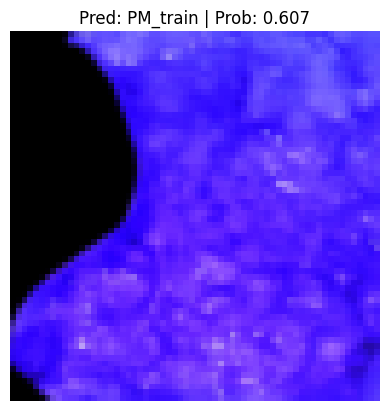

In [75]:
# Pred on our custom image
pred_and_plot_image(
    model=model_1,
    image_path=custom_image_path,
    class_names=class_names,
    transform=custom_image_transform,
    device=device,
)

In [76]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred_1}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs_1 = torch.softmax(custom_image_pred_1, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs_1}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label_1 = torch.argmax(custom_image_pred_probs_1, dim=1)
print(f"Prediction label: {custom_image_pred_label_1}")

Prediction logits: tensor([[ 0.1489, -4.7088,  0.5900]], device='cuda:0')
Prediction probabilities: tensor([[0.3903, 0.0030, 0.6067]], device='cuda:0')
Prediction label: tensor([2], device='cuda:0')


In [77]:
custom_image_pred_class_1 = class_names[
    custom_image_pred_label_1.cpu()
]  # put pred label to CPU, otherwise will error
custom_image_pred_class_1, custom_image_pred_probs_1

('PM_train', tensor([[0.3903, 0.0030, 0.6067]], device='cuda:0'))